In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt
import numpy as np

In [2]:
V = 'V_0*phi**2/(phi**2 + m**2)*(1 + A*exp(-0.5*(phi - phi_0)**2/sigma**2) )'
parameters = {'V_0' : 0.79e-10, 'm' : 0.5, 'A' : 1.17035e-3, 'phi_0' : 2.188, 'sigma': 1.59e-2}
potential = PotentialFunction.from_string(V, param_values=parameters) 

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 3.2) 
background.solver()

In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = [background.data(save=True)[i] for i in vars]


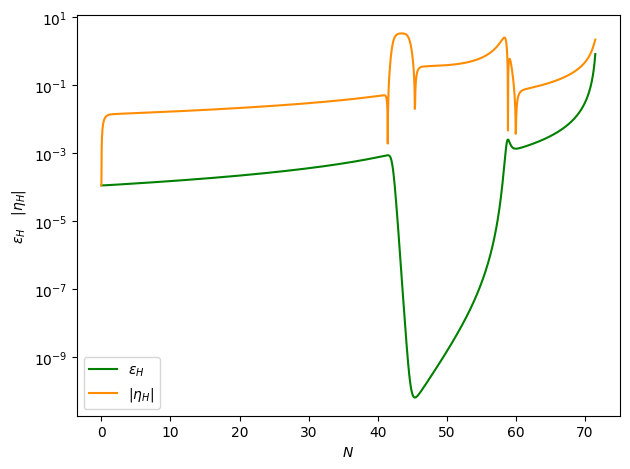

In [4]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')

plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 3)
#plt.title('Slow-roll parameters')
plt.tight_layout()


In [5]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 60)
sol = pert.Power_spectra_pivot()

Curvature power spectrum at pivot scale is 2.122861759137231e-09
Tensor to scalar ratio at pivot scale is 0.0024361115891222726


In [6]:
PS = pert.Power_spectrum(save=True)

Computing P(k): 100%|██████████| 1000/1000 [01:22<00:00, 12.08it/s]


k_peak = 4.84\times 10^{+12} Mpc^-1
N_peak = 43.73058611742712
P_s(k_peak) = 0.028131979397041654
Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

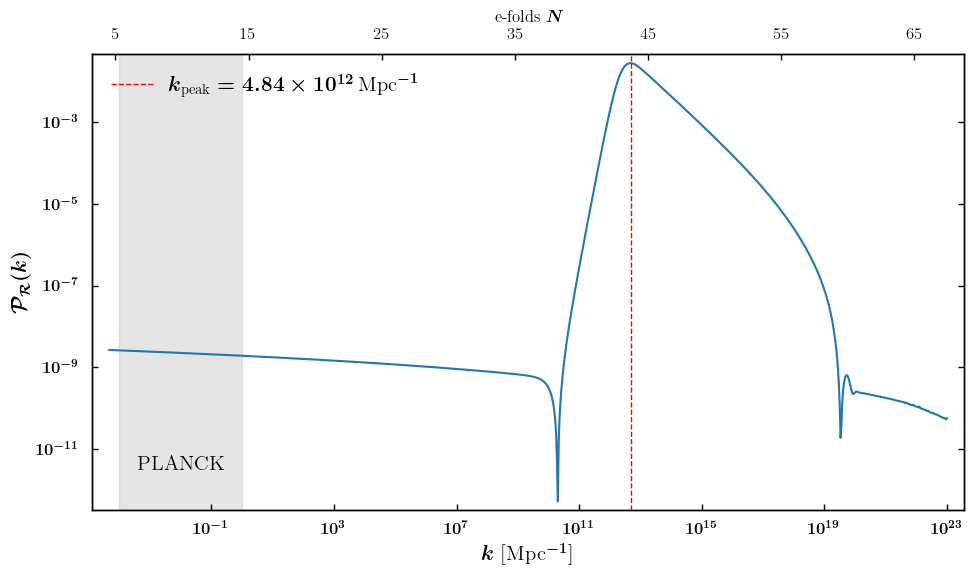

In [7]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save=True)

In [8]:
print(pert.Spectral_tilts)

{'n_s': 0.9658896090229985, 'n_t': -0.0003885759744566128}


In [9]:
pbh = PBHAbundance(pert, delta_c=0.4, gamma=0.2, gstar=107.5)
mPBH, fPBH = pbh.fPBH(save=True)


fPBH_peak = 0.42262085434626445
MPBH_peak = 1.5622501015918724e-13 M⊙


(1e-20, 10000.0)

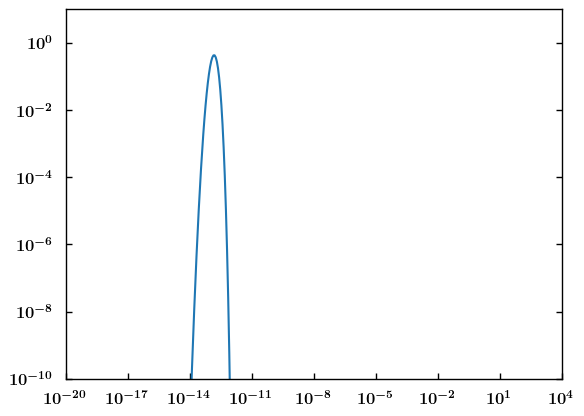

In [10]:
plt.loglog(mPBH, fPBH)
plt.ylim(1e-10, 1e1)
plt.xlim(1e-20, 1e4)
